Problem Statement

This challenge aims to use time series injection information and monitoring test_data on a carbon capture well to predict carbon capture well injection rates deltas. Correlating the change in injection rate to the behavior of other parameters in the well can be used to provide a checkpoint against carbon migration from the well or other losses during the process.  The code developed to predict injection rate deltas based on monitoring well test_data can be used to validate carbon containment throughout the injection of the well. 

In [54]:
# Using AI to Validate Carbon Containment in the Illinois Basin

## Importing Libraries

### First, we will import the necessary Python libraries, such as pandas, numpy, and scikit-learn.
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
test_data = pd.read_csv(r'C:\Users\mlis2\repos\ml-challenge-2023\data\illinois_basing_test_04112023.csv')
train_data = pd.read_csv(r'C:\Users\mlis2\repos\ml-challenge-2023\data\illinois_basing_train.csv')

In [3]:
#train_data.head()

In [4]:
#train_data.describe()

In [5]:

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, tsmode=True, sortby='SampleTimeUTC')
# profile.to_file('profile_report.html')

In [6]:
test_data["SampleTimeUTC"] =pd.to_datetime(test_data["SampleTimeUTC"], format="%m/%d/%Y %H:%M")
train_data["SampleTimeUTC"] =pd.to_datetime(train_data["SampleTimeUTC"], format="%d/%m/%Y %H:%M")

test_data.set_index("SampleTimeUTC", inplace = True)
train_data.set_index("SampleTimeUTC", inplace = True)



Loading and Preprocessing Data

Load the test_dataset and perform some basic preprocessing steps. This includes removing any missing values, converting categorical variables into one-hot encoded format, and scaling the test_data using StandardScaler.    

Exploratory Data Analysis

Explore the test_data to gain insights into its structure and characteristics. Generate visualizations to help identify any patterns or trends in the test_data.

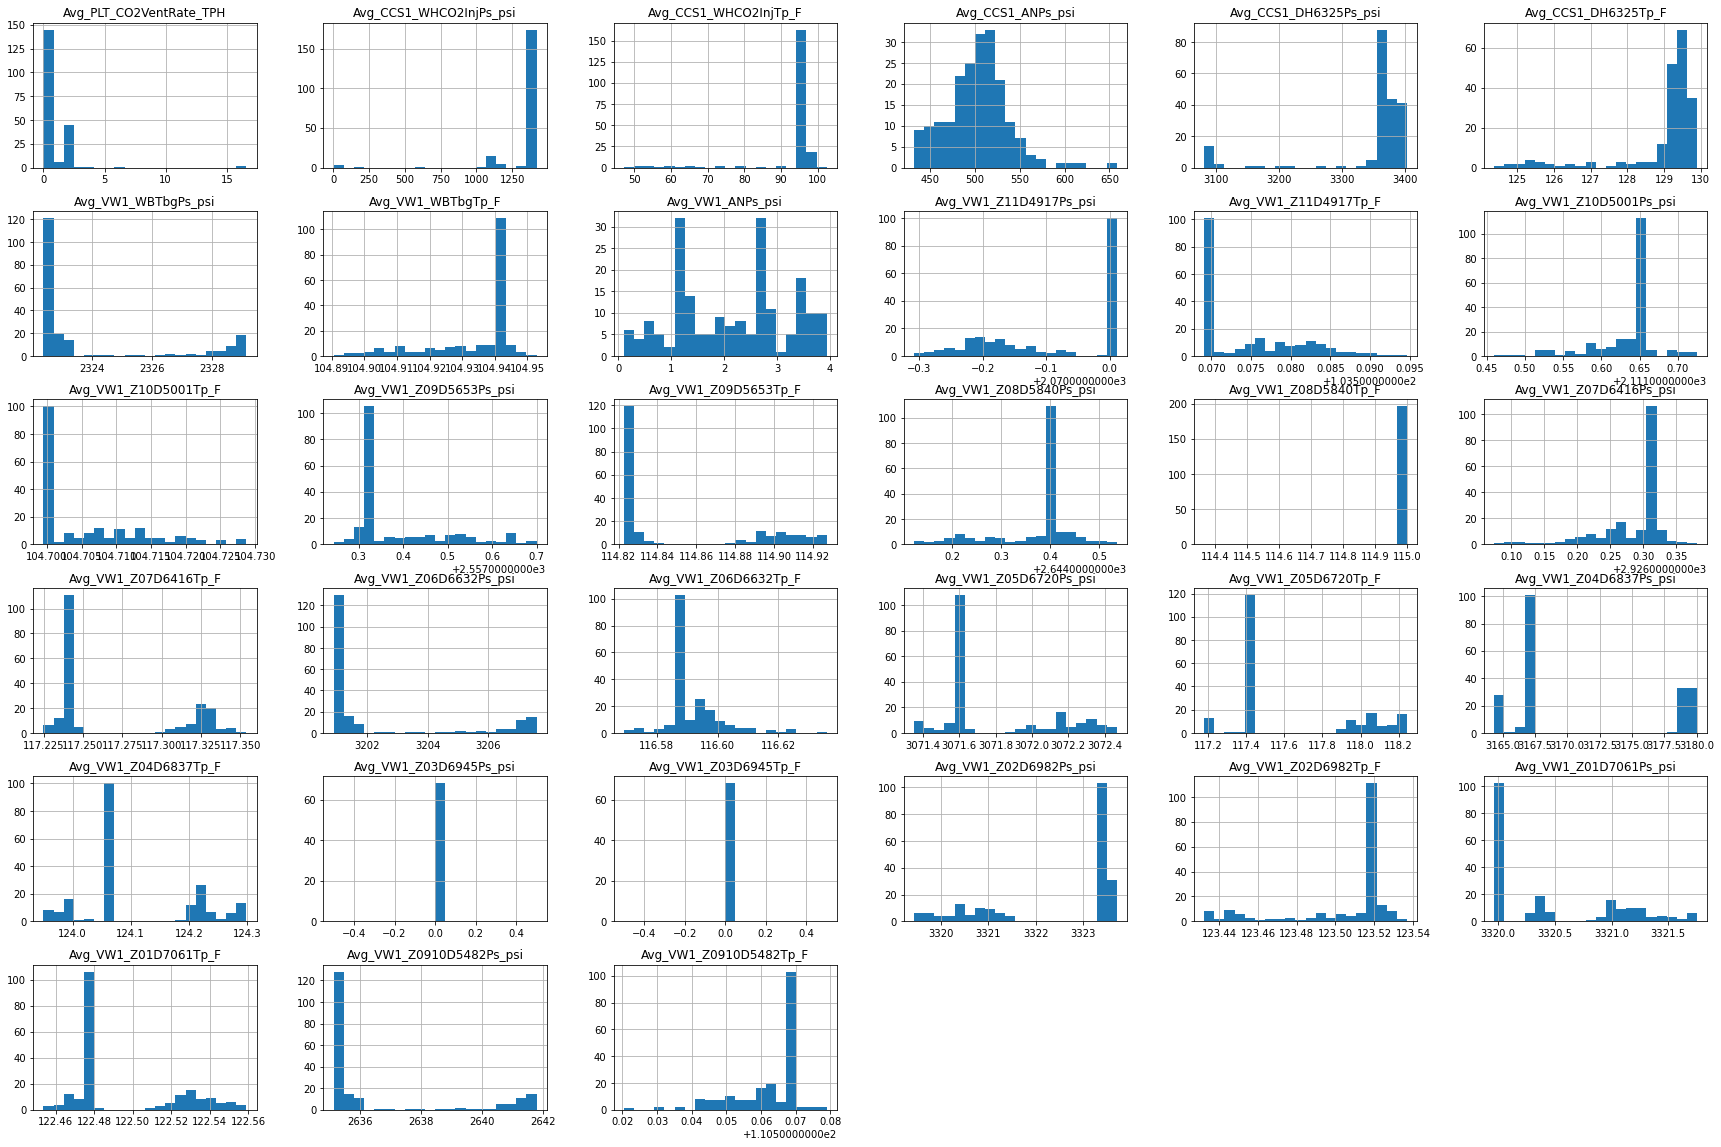

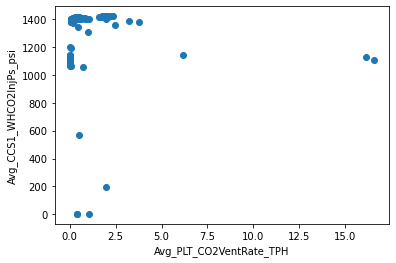

In [7]:
import matplotlib.pyplot as plt

# Generate histograms of each feature
test_data.hist(bins=20, figsize=(30, 20))
plt.show()

# Generate a scatter plot of features
plt.scatter(test_data['Avg_PLT_CO2VentRate_TPH'], test_data['Avg_CCS1_WHCO2InjPs_psi'])
plt.xlabel('Avg_PLT_CO2VentRate_TPH')
plt.ylabel('Avg_CCS1_WHCO2InjPs_psi')
plt.show()


In [8]:
train_data.describe()

,Avg_PLT_CO2InjRate_TPH,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,Avg_VW1_ANPs_psi,...,Avg_VW1_Z04D6837Tp_F,Avg_VW1_Z03D6945Ps_psi,Avg_VW1_Z03D6945Tp_F,Avg_VW1_Z02D6982Ps_psi,Avg_VW1_Z02D6982Tp_F,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F,inj_diff
count,27398.000000,27398.000000,27270.000000,27398.000000,27304.000000,27398.000000,27398.000000,26127.000000,26061.000000,23487.000000,...,26600.000000,24361.000000,25932.000000,26423.000000,26423.000000,25307.000000,25108.000000,26709.000000,26709.000000,27397.000000
mean,36.518907,2.122022,1239.861825,89.766221,560.862134,3244.168246,127.738740,1801.844864,80.794406,525.000311,...,90.967574,2350.941782,182.281703,2456.608853,91.272574,2300.195377,85.859433,1855.603011,86.313992,0.001651
std,72.387820,133.162146,817.740091,48.287324,445.931405,173.471253,7.167508,999.374082,44.286916,3988.707539,...,51.589928,1495.701897,368.506491,1459.143450,52.699934,1521.416947,55.366988,1017.588588,46.720937,82.690245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11021.132640
25%,40.055295,0.000000,1235.469308,92.953925,523.536663,3233.023426,127.166621,2173.526853,103.423346,0.452148,...,118.813235,0.000000,0.000000,0.000000,32.002941,0.000000,0.000000,2353.328436,110.492078,-0.072917
50%,43.112847,0.058333,1338.872024,96.268226,564.901591,3286.067870,130.109008,2322.382139,104.196940,4.656250,...,119.543503,3299.938442,121.297661,3316.204091,121.263339,3318.194554,121.362099,2374.948004,111.453740,0.000000
75%,44.721181,0.150000,1361.045834,96.851236,604.763645,3324.735273,131.082033,2379.839354,105.044018,16.900514,...,119.852003,3320.609979,122.832244,3332.014610,122.027798,3327.320356,122.551008,2416.106108,111.976222,0.074305
max,11033.459030,18333.150000,39032.410160,2879.416016,24105.630860,3515.880615,135.670399,4954.731745,120.056561,31993.509770,...,125.766369,3457.878882,1602.857486,3499.615312,124.310501,3445.065566,133.912303,2758.334188,113.687965,7033.459028


In [9]:
import pandas as pd

# Creating two example dataframes
df1 =train_data
df2 = test_data

# Printing the columns that are not present in both dataframes
columns_not_in_df1 = list(set(df2.columns) - set(df1.columns))
columns_not_in_df2 = list(set(df1.columns) - set(df2.columns))

print(f"Columns not in df1: {columns_not_in_df1}")
print(f"Columns not in df2: {columns_not_in_df2}")


Columns not in df1: []
Columns not in df2: ['Avg_PLT_CO2InjRate_TPH', 'inj_diff']


In [55]:
df = train_data
df_test = test_data

In [56]:
df = df.drop(columns=["Avg_VW1_Z03D6945Ps_psi", "Avg_VW1_Z03D6945Tp_F"])
df_test = df_test.drop(columns=["Avg_VW1_Z03D6945Ps_psi", "Avg_VW1_Z03D6945Tp_F"])

In [57]:
df.columns

Index(['Avg_PLT_CO2InjRate_TPH', 'Avg_PLT_CO2VentRate_TPH',
       'Avg_CCS1_WHCO2InjPs_psi', 'Avg_CCS1_WHCO2InjTp_F', 'Avg_CCS1_ANPs_psi',
       'Avg_CCS1_DH6325Ps_psi', 'Avg_CCS1_DH6325Tp_F', 'Avg_VW1_WBTbgPs_psi',
       'Avg_VW1_WBTbgTp_F', 'Avg_VW1_ANPs_psi', 'Avg_VW1_Z11D4917Ps_psi',
       'Avg_VW1_Z11D4917Tp_F', 'Avg_VW1_Z10D5001Ps_psi',
       'Avg_VW1_Z10D5001Tp_F', 'Avg_VW1_Z09D5653Ps_psi',
       'Avg_VW1_Z09D5653Tp_F', 'Avg_VW1_Z08D5840Ps_psi',
       'Avg_VW1_Z08D5840Tp_F', 'Avg_VW1_Z07D6416Ps_psi',
       'Avg_VW1_Z07D6416Tp_F', 'Avg_VW1_Z06D6632Ps_psi',
       'Avg_VW1_Z06D6632Tp_F', 'Avg_VW1_Z05D6720Ps_psi',
       'Avg_VW1_Z05D6720Tp_F', 'Avg_VW1_Z04D6837Ps_psi',
       'Avg_VW1_Z04D6837Tp_F', 'Avg_VW1_Z02D6982Ps_psi',
       'Avg_VW1_Z02D6982Tp_F', 'Avg_VW1_Z01D7061Ps_psi',
       'Avg_VW1_Z01D7061Tp_F', 'Avg_VW1_Z0910D5482Ps_psi',
       'Avg_VW1_Z0910D5482Tp_F', 'inj_diff'],
      dtype='object')

In [58]:
df

,Avg_PLT_CO2InjRate_TPH,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,Avg_VW1_ANPs_psi,...,Avg_VW1_Z05D6720Tp_F,Avg_VW1_Z04D6837Ps_psi,Avg_VW1_Z04D6837Tp_F,Avg_VW1_Z02D6982Ps_psi,Avg_VW1_Z02D6982Tp_F,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F,inj_diff
SampleTimeUTC,,,,,,,,,,,,,,,,,,,,,
2009-10-01 00:00:00,0.000000,20.543221,1.880208,59.400879,89.967778,2893.787960,116.539694,2173.710958,104.061007,1599.975952,...,119.061967,3109.067771,120.209798,3184.043494,121.462733,3216.464494,120.278862,2441.864587,111.881138,NaN
2009-10-01 01:00:00,0.000000,20.543221,1.374349,55.654541,89.825334,2893.793620,116.538811,2173.762679,104.049292,1599.975952,...,119.066017,3109.106388,120.211298,3184.060020,121.461173,3216.520127,120.276792,2442.006201,111.891938,0.000000
2009-10-01 02:00:00,0.000000,20.543221,1.315104,53.661254,89.806754,2893.791506,116.538623,2173.754085,104.050357,1599.975952,...,119.049007,3109.069061,120.204548,3184.060055,121.468179,3216.510374,120.280932,2442.070968,111.891218,0.000000
2009-10-01 03:00:00,0.000000,20.543221,1.255859,52.319824,89.806754,2893.786399,116.537392,2173.734355,104.051422,1599.975952,...,119.061967,3109.033372,120.209048,3184.031604,121.476759,3216.479380,120.300598,2442.143066,111.899858,0.000000
2009-10-01 04:00:00,0.000000,20.543221,1.342448,48.994263,89.610633,2893.774135,116.537714,2173.738489,104.051422,1599.975952,...,119.057917,3109.042519,120.206798,3184.019531,121.474419,3216.436283,120.307843,2442.282528,111.909219,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-11-18 03:00:00,45.499654,0.408333,1409.701282,95.934610,530.799145,3385.511261,129.515436,2328.919804,104.920363,NaN,...,117.188049,3164.297290,123.910423,3323.237008,123.410697,3320.264079,122.459648,2641.522160,110.559307,-0.031250
2012-11-18 04:00:00,45.408334,0.458333,1409.036129,95.722206,531.937228,3387.451438,129.559802,2328.912415,104.911993,0.100585,...,117.179799,3164.317637,123.913723,3323.269234,123.417552,3320.271702,122.455598,2641.527275,110.556127,-0.091320
2012-11-18 05:00:00,45.270833,0.508333,1408.648841,95.857338,526.400194,3387.077108,129.559708,2328.921606,104.916643,0.100585,...,117.186549,3164.366075,123.916363,3323.339665,123.417567,3320.266923,122.465723,2641.525834,110.557732,-0.137501


In [59]:
freq = '1H'
df_resampled = df.resample(freq).interpolate(method='linear')

In [60]:
df_resampled

,Avg_PLT_CO2InjRate_TPH,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,Avg_VW1_ANPs_psi,...,Avg_VW1_Z05D6720Tp_F,Avg_VW1_Z04D6837Ps_psi,Avg_VW1_Z04D6837Tp_F,Avg_VW1_Z02D6982Ps_psi,Avg_VW1_Z02D6982Tp_F,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F,inj_diff
SampleTimeUTC,,,,,,,,,,,,,,,,,,,,,
2009-10-01 00:00:00,0.000000,20.543221,1.880208,59.400879,89.967778,2893.787960,116.539694,2173.710958,104.061007,1599.975952,...,119.061967,3109.067771,120.209798,3184.043494,121.462733,3216.464494,120.278862,2441.864587,111.881138,NaN
2009-10-01 01:00:00,0.000000,20.543221,1.374349,55.654541,89.825334,2893.793620,116.538811,2173.762679,104.049292,1599.975952,...,119.066017,3109.106388,120.211298,3184.060020,121.461173,3216.520127,120.276792,2442.006201,111.891938,0.000000
2009-10-01 02:00:00,0.000000,20.543221,1.315104,53.661254,89.806754,2893.791506,116.538623,2173.754085,104.050357,1599.975952,...,119.049007,3109.069061,120.204548,3184.060055,121.468179,3216.510374,120.280932,2442.070968,111.891218,0.000000
2009-10-01 03:00:00,0.000000,20.543221,1.255859,52.319824,89.806754,2893.786399,116.537392,2173.734355,104.051422,1599.975952,...,119.061967,3109.033372,120.209048,3184.031604,121.476759,3216.479380,120.300598,2442.143066,111.899858,0.000000
2009-10-01 04:00:00,0.000000,20.543221,1.342448,48.994263,89.610633,2893.774135,116.537714,2173.738489,104.051422,1599.975952,...,119.057917,3109.042519,120.206798,3184.019531,121.474419,3216.436283,120.307843,2442.282528,111.909219,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-11-18 03:00:00,45.499654,0.408333,1409.701282,95.934610,530.799145,3385.511261,129.515436,2328.919804,104.920363,0.100585,...,117.188049,3164.297290,123.910423,3323.237008,123.410697,3320.264079,122.459648,2641.522160,110.559307,-0.031250
2012-11-18 04:00:00,45.408334,0.458333,1409.036129,95.722206,531.937228,3387.451438,129.559802,2328.912415,104.911993,0.100585,...,117.179799,3164.317637,123.913723,3323.269234,123.417552,3320.271702,122.455598,2641.527275,110.556127,-0.091320
2012-11-18 05:00:00,45.270833,0.508333,1408.648841,95.857338,526.400194,3387.077108,129.559708,2328.921606,104.916643,0.100585,...,117.186549,3164.366075,123.916363,3323.339665,123.417567,3320.266923,122.465723,2641.525834,110.557732,-0.137501


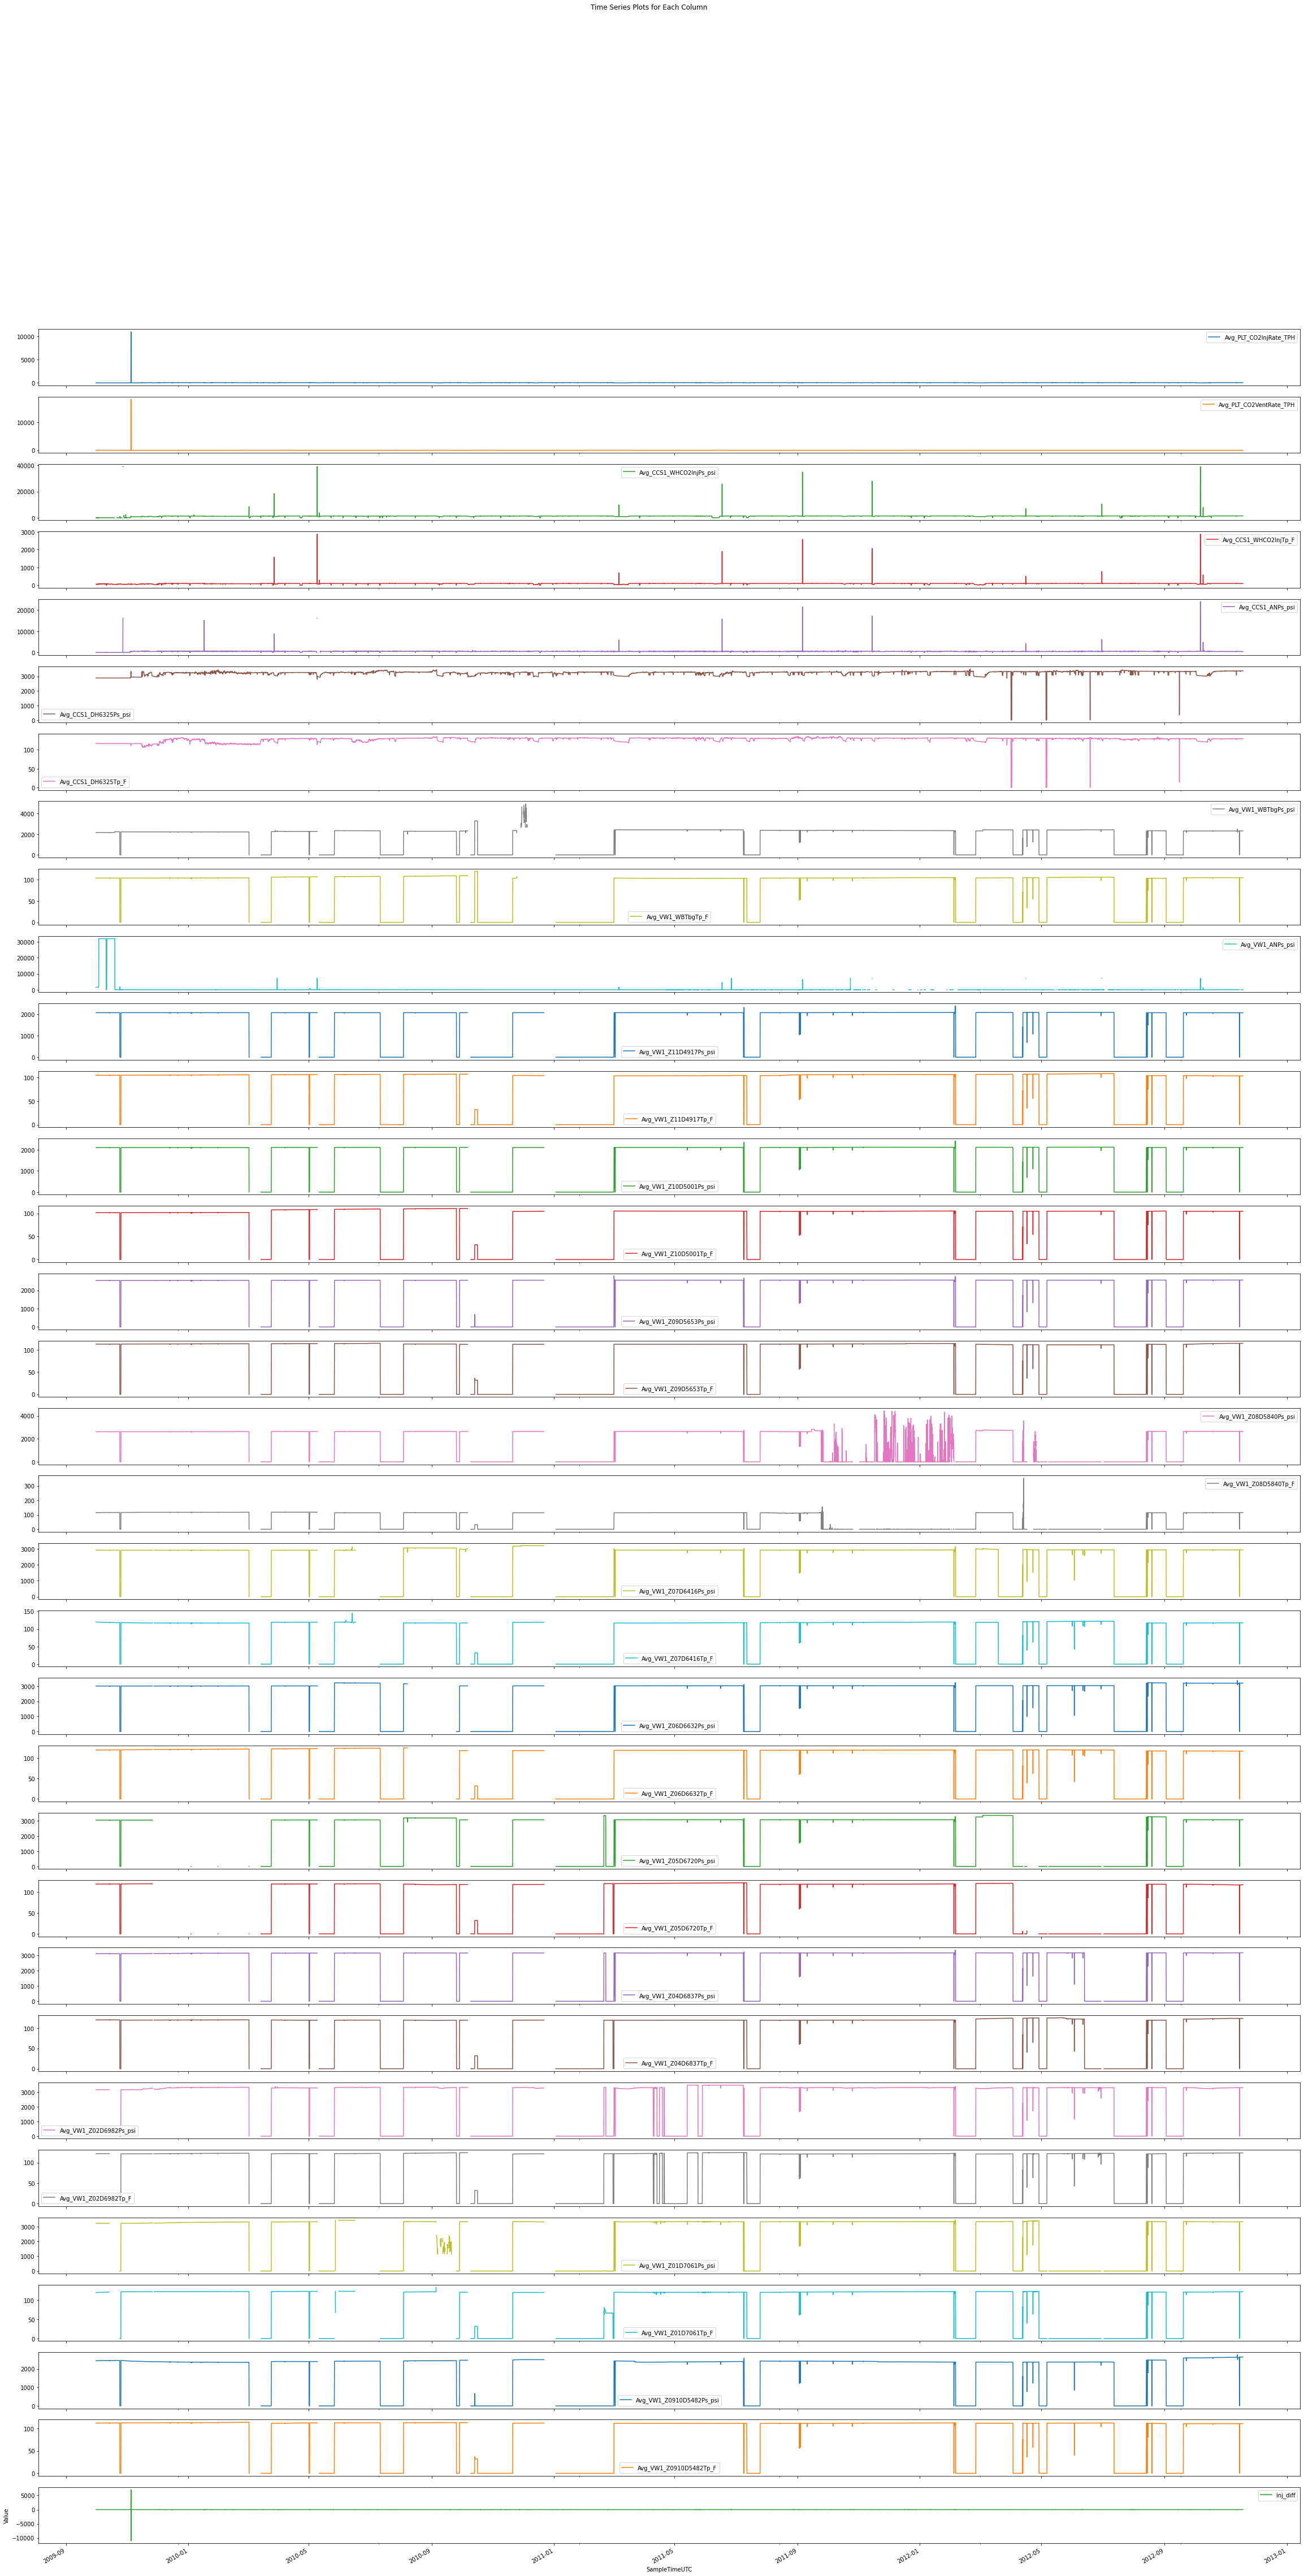

In [61]:
# Convert SampleTimeUTC column to a datetime data type
#test_data['SampleTimeUTC'] = pd.to_datetime(test_data['SampleTimeUTC'])

# Set SampleTimeUTC column as the DataFrame's index
#test_data.set_index('SampleTimeUTC', inplace=True)

# Plot each timeseries column as a separate line chart
df.plot(subplots=True, figsize=(40, 80))

# Set the title and axis labels for the plot
plt.suptitle('Time Series Plots for Each Column')
plt.xlabel('SampleTimeUTC')
plt.ylabel('Value')

# Save the plot as a PNG file
plt.show()

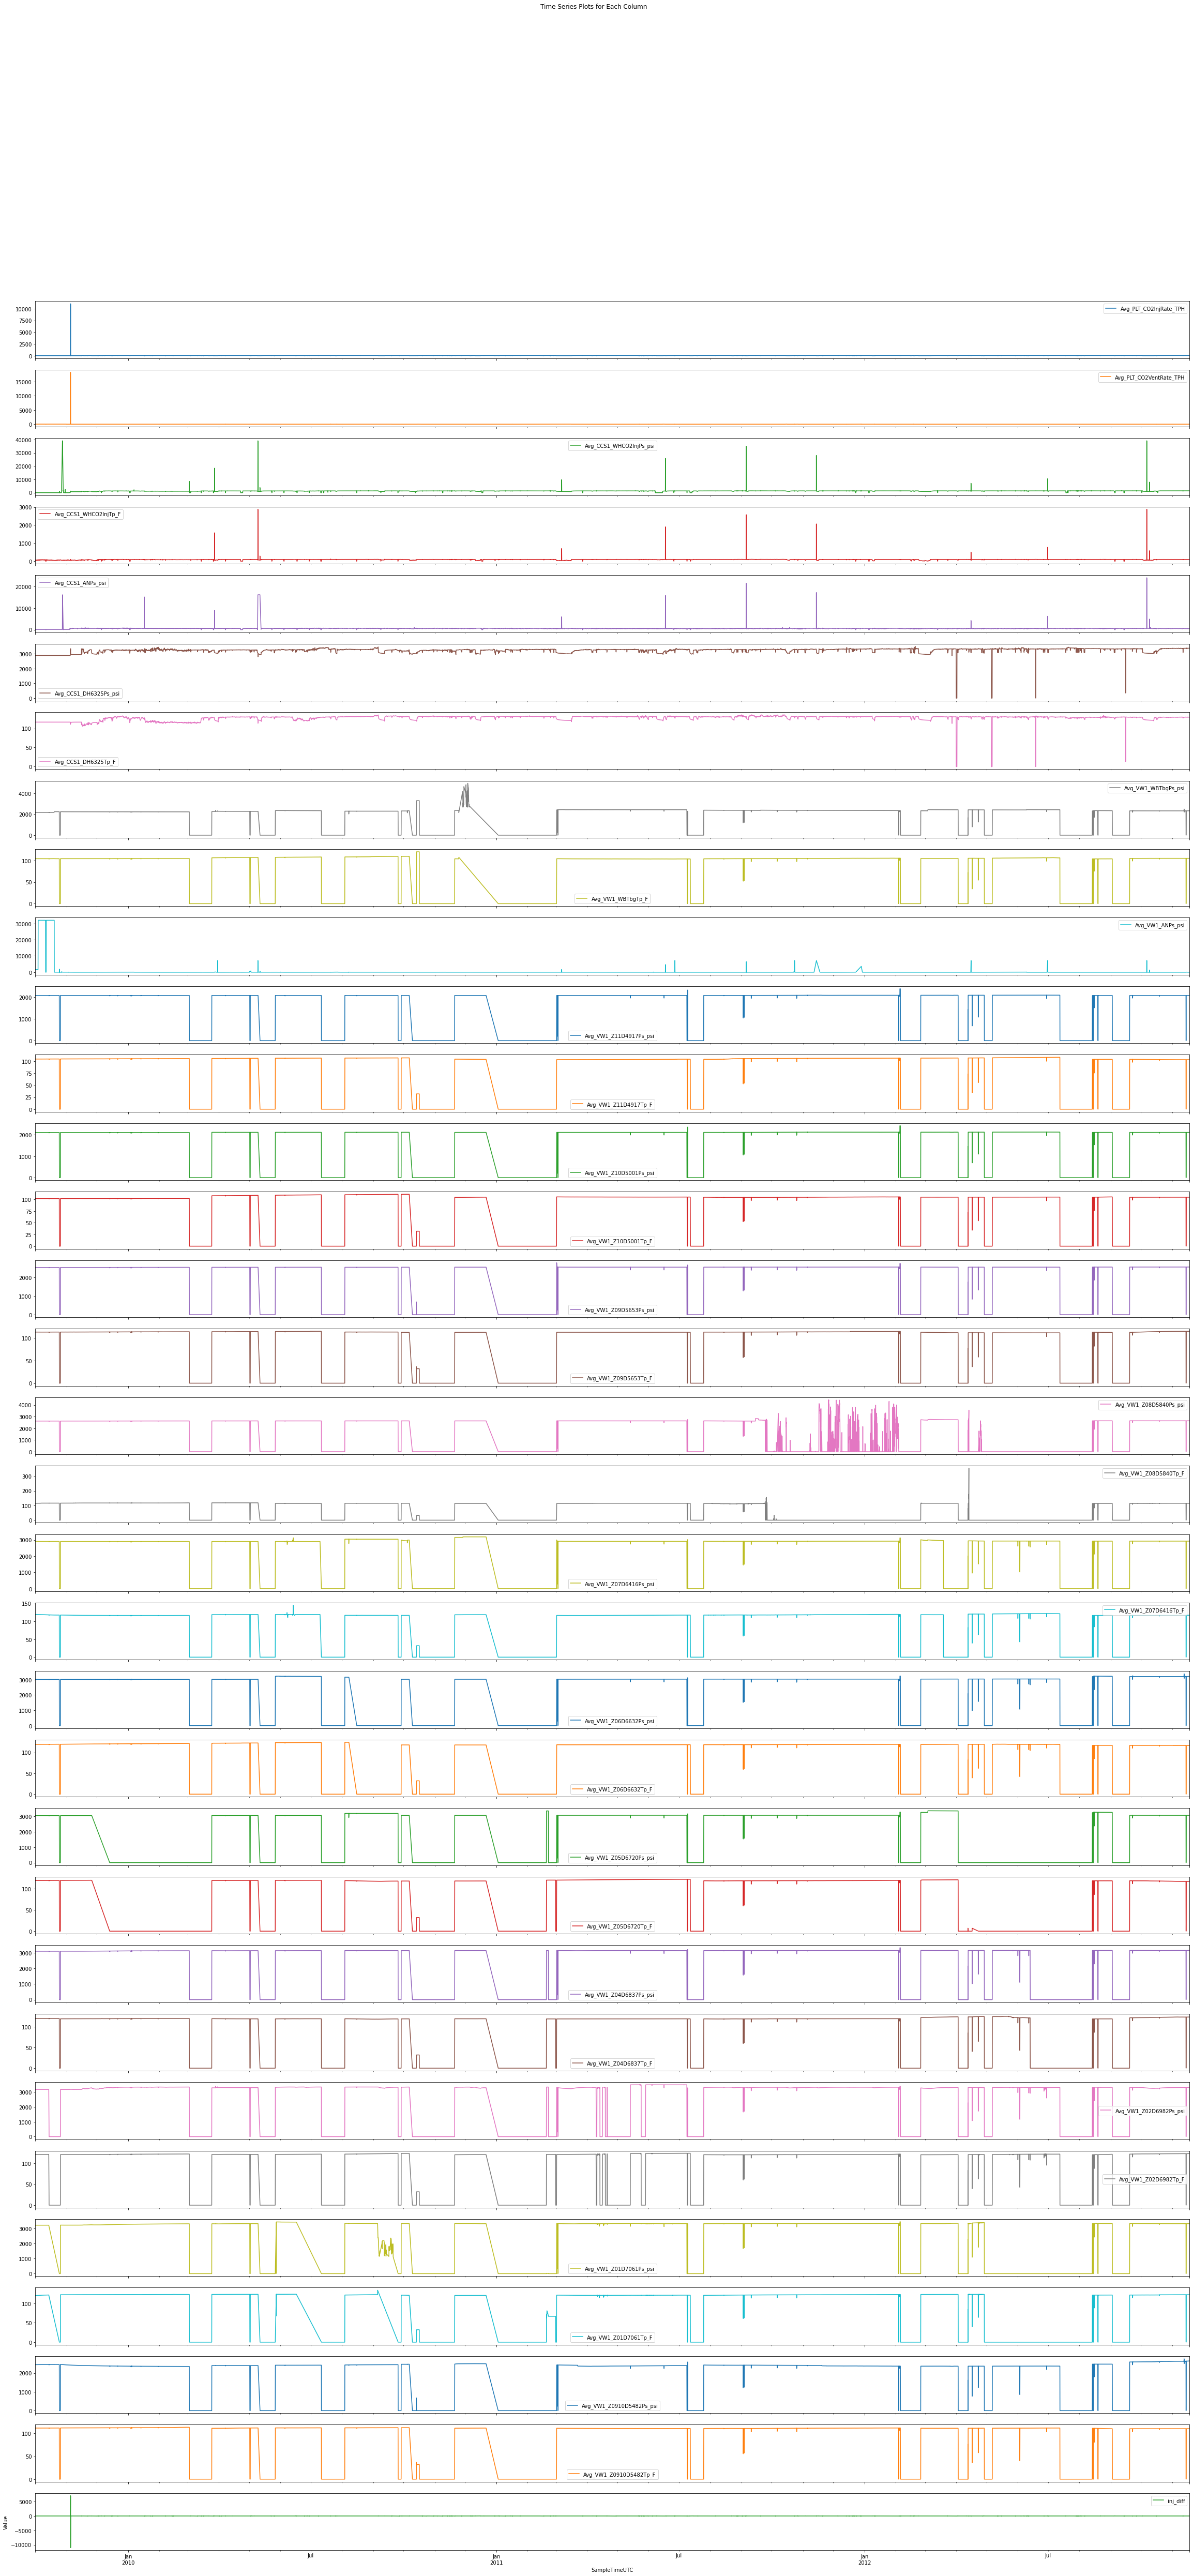

In [62]:
df_resampled.plot(subplots=True, figsize=(40, 80))

# Set the title and axis labels for the plot
plt.suptitle('Time Series Plots for Each Column')
plt.xlabel('SampleTimeUTC')
plt.ylabel('Value')

# Save the plot as a PNG file
plt.show()

In [63]:
# from scipy.signal import savgol_filter
# def smooth_dataframe(df, window_size=5, poly_order=2):
#     """
#     Smooths a Pandas dataframe using the Savitzky-Golay filter.

#     Parameters:
#         df (pd.DataFrame): The dataframe to be smoothed.
#         window_size (int): The size of the sliding window used by the filter.
#         poly_order (int): The order of the polynomial used by the filter.

#     Returns:
#         pd.DataFrame: The smoothed dataframe.
#     """

#     # Copy the input dataframe to avoid modifying the original
#     smoothed_df = df.copy()

#     # Loop over each column in the dataframe and apply the filter
#     for col in smoothed_df.columns:
#         # Get the values for the current column
#         y = smoothed_df[col].values
#         # Apply the filter
#         smoothed_y = savgol_filter(y, window_size, poly_order)
#         # Replace the original column with the smoothed values
#         smoothed_df[col] = smoothed_y

#     return smoothed_df

In [64]:
df_resampled

,Avg_PLT_CO2InjRate_TPH,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,Avg_VW1_ANPs_psi,...,Avg_VW1_Z05D6720Tp_F,Avg_VW1_Z04D6837Ps_psi,Avg_VW1_Z04D6837Tp_F,Avg_VW1_Z02D6982Ps_psi,Avg_VW1_Z02D6982Tp_F,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F,inj_diff
SampleTimeUTC,,,,,,,,,,,,,,,,,,,,,
2009-10-01 00:00:00,0.000000,20.543221,1.880208,59.400879,89.967778,2893.787960,116.539694,2173.710958,104.061007,1599.975952,...,119.061967,3109.067771,120.209798,3184.043494,121.462733,3216.464494,120.278862,2441.864587,111.881138,NaN
2009-10-01 01:00:00,0.000000,20.543221,1.374349,55.654541,89.825334,2893.793620,116.538811,2173.762679,104.049292,1599.975952,...,119.066017,3109.106388,120.211298,3184.060020,121.461173,3216.520127,120.276792,2442.006201,111.891938,0.000000
2009-10-01 02:00:00,0.000000,20.543221,1.315104,53.661254,89.806754,2893.791506,116.538623,2173.754085,104.050357,1599.975952,...,119.049007,3109.069061,120.204548,3184.060055,121.468179,3216.510374,120.280932,2442.070968,111.891218,0.000000
2009-10-01 03:00:00,0.000000,20.543221,1.255859,52.319824,89.806754,2893.786399,116.537392,2173.734355,104.051422,1599.975952,...,119.061967,3109.033372,120.209048,3184.031604,121.476759,3216.479380,120.300598,2442.143066,111.899858,0.000000
2009-10-01 04:00:00,0.000000,20.543221,1.342448,48.994263,89.610633,2893.774135,116.537714,2173.738489,104.051422,1599.975952,...,119.057917,3109.042519,120.206798,3184.019531,121.474419,3216.436283,120.307843,2442.282528,111.909219,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-11-18 03:00:00,45.499654,0.408333,1409.701282,95.934610,530.799145,3385.511261,129.515436,2328.919804,104.920363,0.100585,...,117.188049,3164.297290,123.910423,3323.237008,123.410697,3320.264079,122.459648,2641.522160,110.559307,-0.031250
2012-11-18 04:00:00,45.408334,0.458333,1409.036129,95.722206,531.937228,3387.451438,129.559802,2328.912415,104.911993,0.100585,...,117.179799,3164.317637,123.913723,3323.269234,123.417552,3320.271702,122.455598,2641.527275,110.556127,-0.091320
2012-11-18 05:00:00,45.270833,0.508333,1408.648841,95.857338,526.400194,3387.077108,129.559708,2328.921606,104.916643,0.100585,...,117.186549,3164.366075,123.916363,3323.339665,123.417567,3320.266923,122.465723,2641.525834,110.557732,-0.137501


In [65]:
import scipy.ndimage.filters as filters

def smooth_dataframe_gaus(df, sigma=2):
    

    smoothed_df = df.copy()


    for col in smoothed_df.columns:
        y = smoothed_df[col].values
        smoothed_y = filters.gaussian_filter1d(y, sigma=sigma)
        smoothed_df[col] = smoothed_y

    return smoothed_df


In [66]:
df_smooth = smooth_dataframe_gaus(df_resampled, sigma=2)

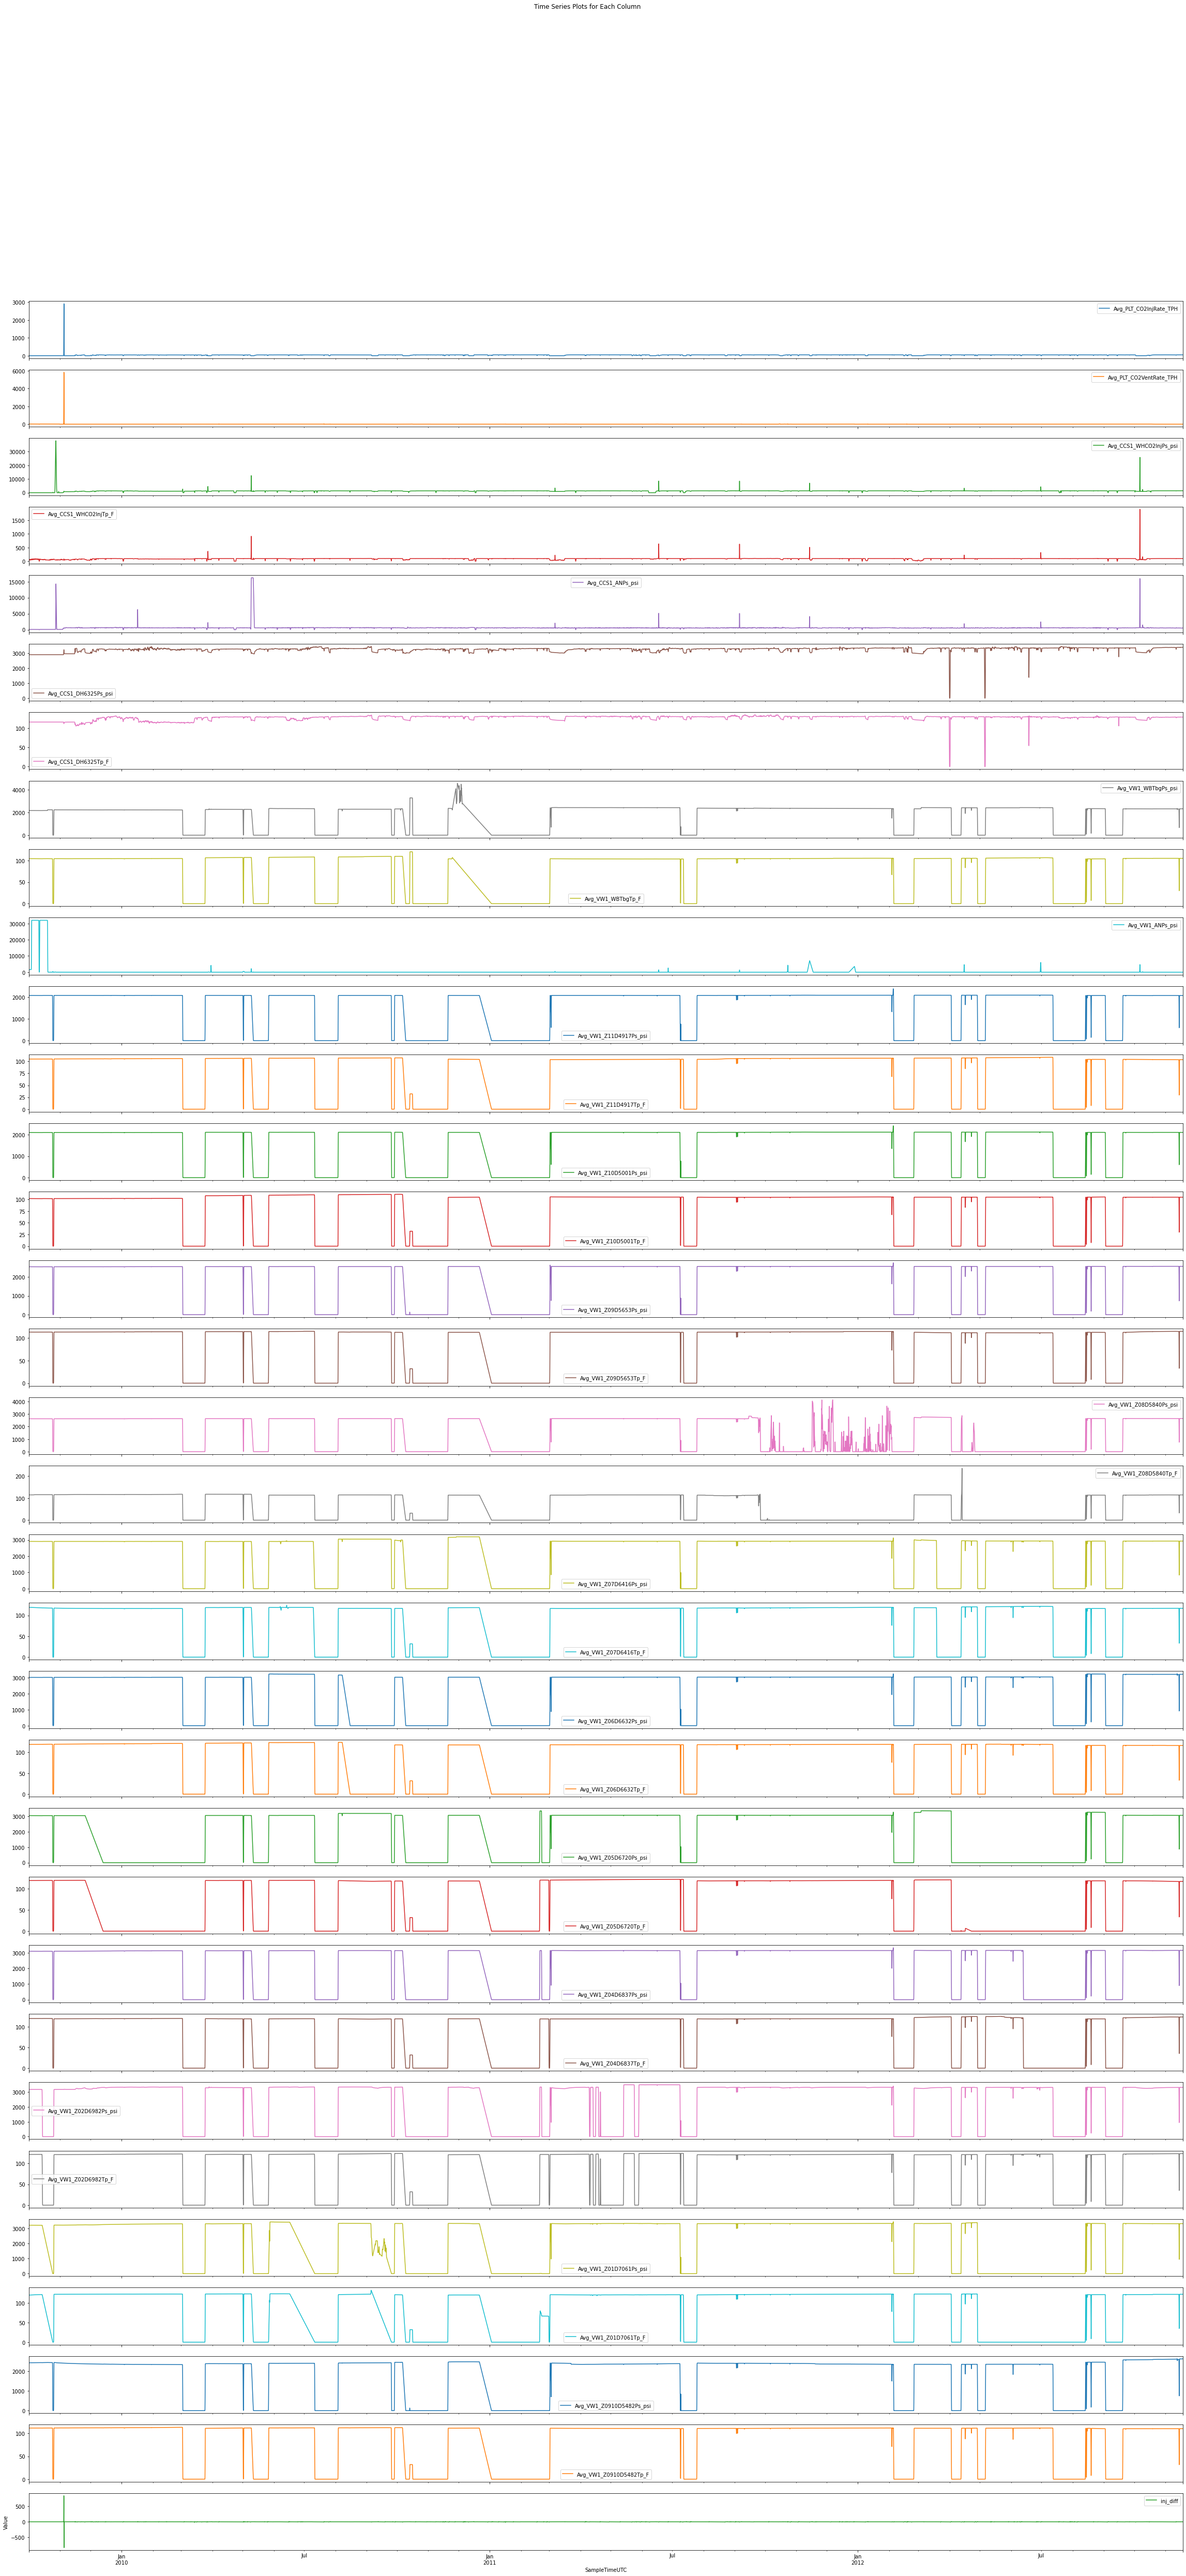

In [67]:
df_smooth.plot(subplots=True, figsize=(40, 80))

# Set the title and axis labels for the plot
plt.suptitle('Time Series Plots for Each Column')
plt.xlabel('SampleTimeUTC')
plt.ylabel('Value')

# Save the plot as a PNG file
plt.show()

In [68]:
# Compute correlation matrix
corr_matrix = df_smooth.corr()

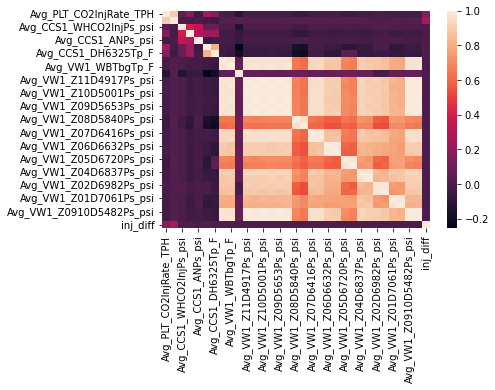

In [22]:
import seaborn as sns
sns.heatmap(corr_matrix)
plt.show()

In [69]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [70]:
df_smooth.columns

Index(['Avg_PLT_CO2InjRate_TPH', 'Avg_PLT_CO2VentRate_TPH',
       'Avg_CCS1_WHCO2InjPs_psi', 'Avg_CCS1_WHCO2InjTp_F', 'Avg_CCS1_ANPs_psi',
       'Avg_CCS1_DH6325Ps_psi', 'Avg_CCS1_DH6325Tp_F', 'Avg_VW1_WBTbgPs_psi',
       'Avg_VW1_WBTbgTp_F', 'Avg_VW1_ANPs_psi', 'Avg_VW1_Z11D4917Ps_psi',
       'Avg_VW1_Z11D4917Tp_F', 'Avg_VW1_Z10D5001Ps_psi',
       'Avg_VW1_Z10D5001Tp_F', 'Avg_VW1_Z09D5653Ps_psi',
       'Avg_VW1_Z09D5653Tp_F', 'Avg_VW1_Z08D5840Ps_psi',
       'Avg_VW1_Z08D5840Tp_F', 'Avg_VW1_Z07D6416Ps_psi',
       'Avg_VW1_Z07D6416Tp_F', 'Avg_VW1_Z06D6632Ps_psi',
       'Avg_VW1_Z06D6632Tp_F', 'Avg_VW1_Z05D6720Ps_psi',
       'Avg_VW1_Z05D6720Tp_F', 'Avg_VW1_Z04D6837Ps_psi',
       'Avg_VW1_Z04D6837Tp_F', 'Avg_VW1_Z02D6982Ps_psi',
       'Avg_VW1_Z02D6982Tp_F', 'Avg_VW1_Z01D7061Ps_psi',
       'Avg_VW1_Z01D7061Tp_F', 'Avg_VW1_Z0910D5482Ps_psi',
       'Avg_VW1_Z0910D5482Tp_F', 'inj_diff'],
      dtype='object')

In [71]:
inj_diff_col = df_smooth.pop('inj_diff')  # remove the column from its current position
df_smooth.insert(0, 'inj_diff', inj_diff_col)
df_smooth.describe()

,inj_diff,Avg_PLT_CO2InjRate_TPH,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,...,Avg_VW1_Z05D6720Ps_psi,Avg_VW1_Z05D6720Tp_F,Avg_VW1_Z04D6837Ps_psi,Avg_VW1_Z04D6837Tp_F,Avg_VW1_Z02D6982Ps_psi,Avg_VW1_Z02D6982Tp_F,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F
count,27455.000000,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000,...,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000
mean,-0.000963,36.523975,2.122421,1259.896853,89.810133,601.130018,3244.265526,127.741043,1779.836505,78.854873,...,1886.774007,73.781726,2304.950162,89.295472,2396.654601,89.035511,2229.408820,83.254235,1825.772018,84.903997
std,11.528811,36.497706,68.430100,994.187657,32.007618,809.676246,164.693724,6.870930,1011.977393,44.534856,...,1493.035708,57.056252,1378.360768,52.020877,1474.196005,53.345851,1511.329511,54.975295,1025.340876,47.120166
min,-832.571952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.043716,39.580702,0.000092,1233.445798,92.761572,529.239036,3232.002116,127.175237,1462.403691,54.092059,...,0.000000,0.000000,0.096419,27.019131,0.000000,0.256480,0.000000,0.000000,1924.664820,99.715972
50%,0.000000,43.014662,0.070312,1337.628540,96.267653,564.493973,3284.566090,130.092769,2322.228870,104.136155,...,3061.688355,118.071701,3147.211091,119.514020,3313.014758,121.190250,3310.298096,121.111717,2373.252231,111.379808
75%,0.047437,44.605792,0.170425,1360.354489,96.751678,600.425495,3322.555630,131.067803,2378.872036,105.005358,...,3073.298446,119.252892,3153.207470,119.832593,3331.431885,121.960305,3326.430639,122.500754,2415.716844,111.961359
max,841.042974,2907.208275,5819.190490,37936.717144,1904.230034,16217.209960,3453.004038,135.566305,4577.610575,120.042468,...,3365.501116,122.050617,3330.788118,125.697607,3498.872524,124.310501,3444.159300,132.681399,2646.742125,113.672582


In [72]:
# import tensorflow as tf
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # Load the data into a pandas DataFrame
# df = df_smooth 

# # Define the columns to exclude from the input data
# exclude_cols = ['inj_diff', 'Avg_PLT_CO2InjRate_TPH']

# # Normalize the data using MinMaxScaler
# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df.drop(exclude_cols, axis=1))

# # Split the data into training and validation sets
# train_size = int(len(df_scaled) * 0.8)
# train_data = df_scaled[:train_size, :]
# val_data = df_scaled[train_size:, :]

# # Define the input and output sequence lengths
# input_seq_len = 24 # number of hours
# output_seq_len = 1 # number of hours to predict

# # Define the number of features (columns) in the input data
# n_features = df_scaled.shape[1]

# # Define the batch size and number of epochs for training the model
# batch_size = 32
# epochs = 100

# # Define the model architecture using Keras
# model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(64, input_shape=(input_seq_len, n_features)),
#     tf.keras.layers.Dense(output_seq_len)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# history = model.fit(
#     tf.keras.preprocessing.sequence.TimeseriesGenerator(train_data, df_smooth['inj_diff'][:train_size].values, length=input_seq_len, batch_size=batch_size),
#     epochs=epochs,
#     validation_data=tf.keras.preprocessing.sequence.TimeseriesGenerator(val_data, df_smooth['inj_diff'][train_size:].values, length=input_seq_len, batch_size=batch_size),
# )

# # Evaluate the model on the validation set
# val_loss = model.evaluate(
#     tf.keras.preprocessing.sequence.TimeseriesGenerator(val_data, df_smooth['inj_diff'][train_size:].values, length=input_seq_len, batch_size=batch_size),
# )

# # Print the validation loss
# print('Validation loss:', val_loss)




In [73]:

# df_test 
# # Determine the number of excess data points
# num_excess_points = len(df_test) % (input_seq_len * n_features)

# # Trim the excess data points from the test dataset
# df_test_trimmed = df_test[:-num_excess_points]

# # Preprocess the test data using the same MinMaxScaler object
# df_test_scaled = scaler.transform(df_test_trimmed)

# # Reshape the test data to match the input shape of the LSTM layer
# test_data = df_test_scaled.reshape((-1, input_seq_len, n_features))

# # Make predictions using the model
# predictions = model.predict(test_data)

# # Reshape the predictions to match the shape of the test data
# predictions = predictions.reshape((-1, n_features))

# # Rescale the predictions using the MinMaxScaler object
# predictions_rescaled = scaler.inverse_transform(predictions)

# # Extract the predicted 'inj_diff' and 'Avg_PLT_CO2InjRate_TPH' from the predictions
# inj_diff_predictions = predictions_rescaled[:, -2]
# avg_plt_co2injrate_tph_predictions = predictions_rescaled[:, -1]


In [74]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [97]:
print(type(df_smooth))
start_year = df_smooth.index.min().year
end_year = df_smooth.index.max().year
num_years = end_year - start_year + 1

print(f"Total number of years of data: {num_years}")

<class 'pandas.core.frame.DataFrame'>
Total number of years of data: 4


In [105]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = df_smooth
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))

scaled = scaler.fit_transform(values)
print("Scaler shape", scaled.shape)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[]], axis=1, inplace=True)
print(reframed.head())
 

Scaler shape (27464, 33)
    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
10   0.497469        0.0    0.00353   0.000009   0.037746   0.005512   
11   0.497469        0.0    0.00353   0.000007   0.036944   0.005511   
12   0.497469        0.0    0.00353   0.000006   0.038147   0.005516   
13   0.497469        0.0    0.00353   0.000006   0.041648   0.005527   
14   0.497469        0.0    0.00353   0.000005   0.048505   0.005544   

    var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var24(t)  var25(t)  \
10   0.838041   0.859632   0.474861    0.866808  ...  0.906934  0.975400   
11   0.838043   0.859631   0.474863    0.866796  ...  0.906935  0.975399   
12   0.838046   0.859630   0.474863    0.866782  ...  0.906938  0.975406   
13   0.838049   0.859629   0.474864    0.866770  ...  0.906941  0.975418   
14   0.838052   0.859627   0.474866    0.866762  ...  0.906943  0.975426   

    var26(t)  var27(t)  var28(t)  var29(t)  var30(t)  var31(t)  var32(t)  \
10  0.933

In [115]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24 * 1
train = values[:n_train_hours, :]
print("train shape", train.shape)
test = values[n_train_hours:, :]
print('test shape', test.shape)
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#test_y = test_y.reshape((test_y.shape[0], 1, test_y.shape[1]))
print("Train_X_shape", train_X.shape, "Train_y_shape",train_y.shape, "Test_X_shape",test_X.shape, "Test_y_shape",test_y.shape)
 

train shape (8760, 66)
test shape (18694, 66)
Train_X_shape (8760, 1, 65) Train_y_shape (8760,) Test_X_shape (18694, 1, 65) Test_y_shape (18694,)


Epoch 1/60
122/122 - 3s - loss: 0.0803 - val_loss: 0.0719 - 3s/epoch - 28ms/step
Epoch 2/60
122/122 - 1s - loss: 0.0334 - val_loss: 0.0718 - 658ms/epoch - 5ms/step
Epoch 3/60
122/122 - 1s - loss: 0.0283 - val_loss: 0.0421 - 640ms/epoch - 5ms/step
Epoch 4/60
122/122 - 1s - loss: 0.0210 - val_loss: 0.0444 - 693ms/epoch - 6ms/step
Epoch 5/60
122/122 - 1s - loss: 0.0325 - val_loss: 0.0352 - 691ms/epoch - 6ms/step
Epoch 6/60
122/122 - 1s - loss: 0.0156 - val_loss: 0.0335 - 671ms/epoch - 6ms/step
Epoch 7/60
122/122 - 1s - loss: 0.0231 - val_loss: 0.0304 - 651ms/epoch - 5ms/step
Epoch 8/60
122/122 - 1s - loss: 0.0169 - val_loss: 0.0360 - 669ms/epoch - 5ms/step
Epoch 9/60
122/122 - 1s - loss: 0.0169 - val_loss: 0.0668 - 658ms/epoch - 5ms/step
Epoch 10/60
122/122 - 1s - loss: 0.0268 - val_loss: 0.0313 - 676ms/epoch - 6ms/step
Epoch 11/60
122/122 - 1s - loss: 0.0164 - val_loss: 0.0478 - 668ms/epoch - 5ms/step
Epoch 12/60
122/122 - 1s - loss: 0.0270 - val_loss: 0.0668 - 656ms/epoch - 5ms/step
Epo

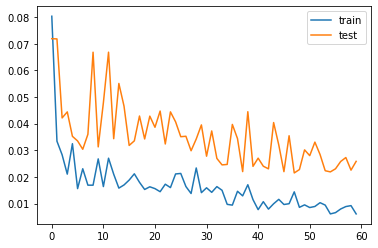

In [116]:

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=60, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 


In [119]:
# make a prediction
yhat = model.predict(test_X)
print('yhat shape', yhat.shape)

test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, :-1]), axis=1)
scaler.fit(reframed)
n_features = reframed.shape[1] - 1
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)[:, :n_features]
inv_yhat = inv_yhat[:,0]  # select only the first column

print('inv_yhat shape',  inv_yhat.shape)
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
#scaler.fit(reframed)
inv_yhat = inv_yhat.reshape(-1, 1)
inv_y = inv_y.reshape(-1, 1)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

TypeError: in user code:

    File "c:\Users\mlis2\Anaconda3\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\mlis2\Anaconda3\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mlis2\Anaconda3\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\mlis2\Anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\mlis2\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\mlis2\Anaconda3\lib\site-packages\keras\layers\rnn\lstm.py", line 615, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_20' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_20' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [86]:
print(test_y.shape)
print(test_X.shape)

(9934,)
(9934, 65)


In [ ]:
last_sequence = scaled_data[-seq_length:]
predicted_values = []
for i in range(200):
    predicted_value = model.predict(last_sequence.reshape(1, seq_length, n_features))[0][0]
    predicted_values.append(predicted_value)
    last_sequence = np.append(last_sequence[1:], predicted_value).reshape(seq_length, n_features)

# Inverse transform the predicted values and print them
predicted_values = np.array(predicted_values).reshape(-1, 1)
predicted_values = scaler.inverse_transform(predicted_values)
predicted_dates = pd.date_range(start=data.index[-1], periods=200, freq='D')[1:]
predicted_df = pd.DataFrame(data=predicted_values, index=predicted_dates, columns=['inj_diff'])
print(predicted_df)

In [67]:
import pandas as pd

# compare dataframes and drop columns in df_test_time that are not in df_smooth
for col in df_test_time.columns:
    if col not in df_smooth.columns:
        df_test_time = df_test_time.drop(col, axis=1)

# print resulting dataframes
print(df_smooth)
print(df_test_time)


                     Avg_PLT_CO2InjRate_TPH  Avg_PLT_CO2VentRate_TPH  \
SampleTimeUTC                                                          
2009-01-10 00:00:00                0.000000                20.543221   
2009-01-10 01:00:00                0.000000                20.543221   
2009-01-10 02:00:00                0.000000                20.543221   
2009-01-10 03:00:00                0.000000                20.543221   
2009-01-10 04:00:00                0.000000                20.543221   
...                                     ...                      ...   
2012-12-11 19:00:00               45.079709                 0.180412   
2012-12-11 20:00:00               45.077629                 0.226310   
2012-12-11 21:00:00               45.091822                 0.280506   
2012-12-11 22:00:00               45.111007                 0.323737   
2012-12-11 23:00:00               45.123948                 0.346422   

                     Avg_CCS1_WHCO2InjPs_psi  Avg_CCS1_WHCO2Inj

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the blind data into a pandas DataFrame
df_blind = df_test_time

# Load the saved model
model = load_model('saved_model.h5')

# Load the scaler used for training the model
scaler = MinMaxScaler()
scaler.fit_transform(df_smooth) # assuming you already have df_train for training

# Normalize the blind data using the same scaler
df_blind_scaled = scaler.transform(df_blind)

# Define the input data for prediction
input_seq_len = 24 # example input sequence length
x_blind = np.expand_dims(df_blind_scaled[-input_seq_len:], axis=0)

# Predict the output data for the input data
y_pred = val_loss.predict(x_blind)

# Print the predicted output value
print('Predicted value:', y_pred[0][0])


OSError: No file or directory found at saved_model.h5

In [71]:


# Load the test dataset into a pandas DataFrame
df_test_time = test_data

df_test_time['SampleTimeUTC'] = pd.to_datetime(df_test_time['SampleTimeUTC'])

df_test_time['year'] = df_test_time['SampleTimeUTC'].dt.year
df_test_time['month'] = df_test_time['SampleTimeUTC'].dt.month
df_test_time['day'] = df_test_time['SampleTimeUTC'].dt.day
df_test_time['hour'] = df_test_time['SampleTimeUTC'].dt.hour

df_test_time.drop(columns=['SampleTimeUTC'], inplace=True)

df_test_time['year'] = df_test_time['year'].astype(float)
df_test_time['month'] = df_test_time['month'].astype(float)
df_test_time['day'] = df_test_time['day'].astype(float)
df_test_time['hour'] = df_test_time['hour'].astype(float)

df_test_time['SampleTimeUTC'] = pd.to_datetime(df_test_time[['year', 'month', 'day', 'hour']])

df_test_time.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)


In [72]:
df_test_time = df_test_time.drop(columns=["Avg_VW1_Z03D6945Ps_psi", "Avg_VW1_Z03D6945Tp_F"])

In [ ]:
# Separate the features from the test dataset
X_test = df_test_time.values

# Apply feature scaling or normalization that was applied to the training data
X_test = scaler.transform(X_test)

# Apply any necessary preprocessing steps to the test data
X_test = np.diff(X_test, axis=0)

# Reshape the test data to the same shape as the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Generate predictions for the test data
predictions = model.predict(X_test)

# Reverse any preprocessing steps applied to the predictions
predictions = scaler.inverse_transform(predictions)

# Extract the predicted values for the target variable
inj_rate_predictions = predictions[:, 0]

# Print the predicted values for the target variable
print("Injection rate predictions:", inj_rate_predictions)


In [ ]:
# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", test_accuracy)

loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Feature Selection

Use correlation analysis to identify the most important features for the machine learning model. This will help to improve the accuracy of predictions and reduce the risk of overfitting

In [ ]:
# Compute correlation matrix
corr_matrix = test_data.corr()

# Generate heatmap of correlation matrix
import seaborn as sns
sns.heatmap(corr_matrix)
plt.show()

# Select the most correlated features
corr_threshold = 0.5
corr_pairs = np.where(np.abs(corr_matrix) > corr_threshold)
corr_pairs = [(corr_matrix.iloc[i, j], i, j) for i, j in zip(*corr_pairs) if i != j and i < j]
corr_pairs.sort(reverse=True)


Model Development

Split the test_data using the preprocessed test_data. Split the test_dataset into training and testing sets. This will allow to evaluate the performance of the machine learning model on unseen test_data.

In [ ]:
# Split test_data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_smooth[df_smooth.columns[:-1]], df_smooth['target'], test_size=0.2, random_state=42)

# Scale the test_data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Selection and Tuning

Experiment different machine learning algorithms, such as logistic regression, decision trees, and random forests, and tune the hyperparameters of each model to find the best combination for the task at hand.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", test_accuracy)

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['lbfgs', 'liblinear', 'saga']}

# Define grid search
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit the grid search
grid.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best hyperparameters:", grid.best_params_)

# Retrain the model with best hyperparameters
model_tuned = LogisticRegression(C=10, penalty='l2', solver='liblinear')
model_tuned.fit(X_train_scaled, y_train)

# Make predictions on testing set
y_pred_tuned = logreg_tuned.predict(X_test_scaled)

# Calculate accuracy
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Accuracy:", accuracy_tuned)


Submission

Once the machine learning model is developed and evaluated, contestants submit the ML code to an SPEMLChallenge@gmail.com.  The results are submitted to the XEEK.org platform for preliminary scoring.   